## Lab 2: Image Negative Transformation, Thresholding, Gray Level Slicing with without background 

In [1]:
import numpy as np
from PIL import Image 
import matplotlib.pyplot as plt
import pandas as pd

---

## Load the data

In [2]:
train = pd.read_csv('images/mnist_train.csv')

print(train.shape)

(60000, 785)


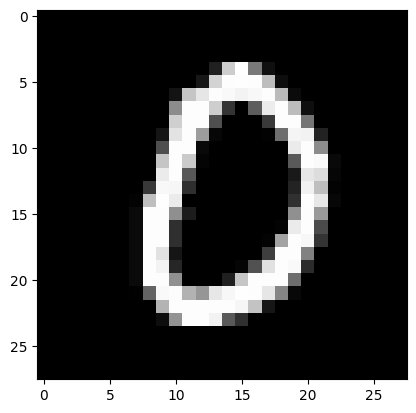

In [3]:
row_num = np.random.randint(train.shape[0])

pixels = train.iloc[row_num][1:].values.reshape(28, 28)
image = np.array(pixels, dtype=np.uint8)
image = Image.fromarray(image)

plt.imshow(image, cmap='gray')
plt.show()

## Image Negative Transformation

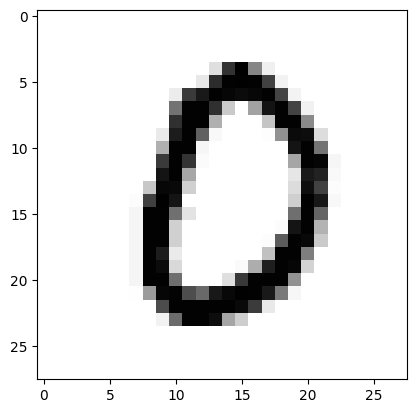

In [4]:
def negative_transformation(image):
    image = np.array(image)
    negative_image = 255 - image
    
    return negative_image

negative_image = negative_transformation(image)
plt.imshow(negative_image, cmap='gray')
plt.show()

### Image Thresholding Operation at various threshold level

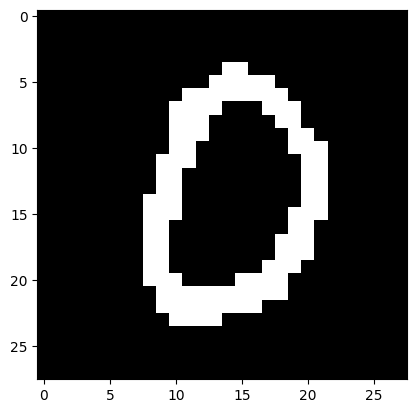

In [6]:
def threshold_image(image, threshold):
    image = np.array(image)
    thresholded_image = image.copy()
    
    thresholded_image[thresholded_image > threshold] = 255
    thresholded_image[thresholded_image <= threshold] = 0
    
    return thresholded_image

threshold = 128
thresholded_image = threshold_image(image, threshold)
plt.imshow(thresholded_image, cmap='gray')
plt.show()

### Gray Level Slicing with Background

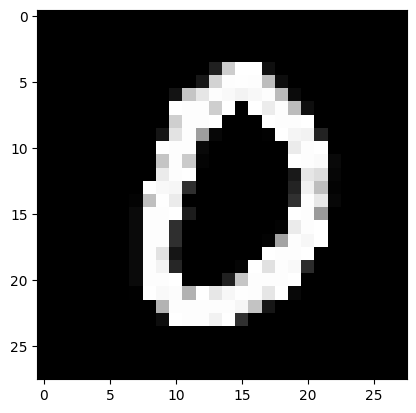

In [7]:
def gls_with_bg(image, lower_threshold, upper_threshold):
    image = np.array(image)
    temp_img = image.copy()

    for i in range(temp_img.shape[0]):
        for j in range(temp_img.shape[1]):
            if (temp_img[i][j] >= lower_threshold and temp_img[i][j] <= upper_threshold):
                temp_img[i][j] = 255

    return np.array(temp_img)

image_gls_with_bg = gls_with_bg(image, 50, 150)
plt.imshow(image_gls_with_bg, cmap='gray')
plt.show()

### Gray Level Slicing without Background

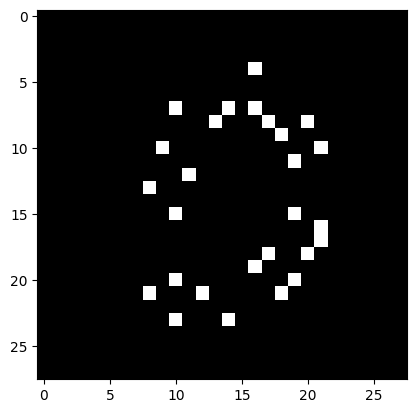

In [8]:
def gls_without_bg(image, lower_threshold, upper_threshold):
    image = np.array(image)
    temp_img = image.copy()

    for i in range(temp_img.shape[0]):
        for j in range(temp_img.shape[1]):
            if (temp_img[i][j] >= lower_threshold and temp_img[i][j] <= upper_threshold):
                temp_img[i][j] = 255
            else:
                temp_img[i][j] = 0

    return np.array(temp_img)

iamge_gls_without_bg = gls_without_bg(image, 50, 150)
plt.imshow(iamge_gls_without_bg, cmap='gray')
plt.show()